In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("mutationc.csv")

In [9]:
ranked_mutations = data.iloc[:,1:].sum().sort_values(ascending=False).keys()
t_actual = data.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
actual = pd.DataFrame(
    np.tile(t_actual.values.reshape(-1,1), len(ranked_mutations)),
    columns=ranked_mutations,
    index=t_actual.index
)

predicted = data[ranked_mutations]
TP = (((actual == 1) & (predicted == 1))).sum()
FP = (((actual == 0) & (predicted == 1))).sum()
FN = (((actual == 1) & (predicted == 0))).sum()
TN = (((actual == 0) & (predicted == 0))).sum()

values = pd.DataFrame({
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    'TP-FP':TP-FP
})
values.sort_values(by="TP-FP",ascending=False)

,TP,FP,FN,TN,TP-FP
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T,28,5,76,92,23
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,27,10,77,87,17
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,13,2,91,95,11
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,11,2,93,95,9
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,13,4,91,93,9
...,...,...,...,...,...
DIAPH2_GRCh37_X:96212916-96212916_Silent_SNP_G-G-A,0,3,104,94,-3
SLC6A15_GRCh37_12:85279790-85279790_Frame-Shift-Del_DEL_A-A--,0,3,104,94,-3
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T,3,7,101,90,-4
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T,1,5,103,92,-4


### Table of Mutations Sorted By TP - FP Values

In [7]:
values.sort_values(by='TP-FP',ascending=False).head(10)

,Mutation,TP,FP,FN,TN,TP-FP
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,28,5,76,92,23
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,27,10,77,87,17
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,13,2,91,95,11
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,11,2,93,95,9
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,13,4,91,93,9
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,25,17,79,80,8
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--,PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shi...,7,0,97,97,7
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--,RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--,7,0,97,97,7
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,11,4,93,93,7
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--,SVIL_GRCh37_10:29760116-29760116_Frame-Shift-D...,7,0,97,97,7


### Confusion Matrix for F (BRAF_GRCh37_7)

/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_18699/2573962117.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PP"] = F.TP[0], F.FP[0]
/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_18699/2573962117.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PN"] = F.FN[0], F.TN[0]


Text(50.72222222222221, 0.5, 'ACTUAL')

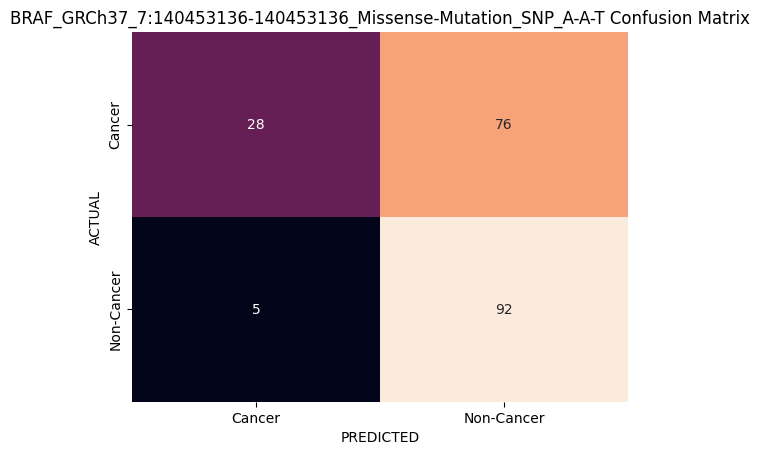

In [8]:
confusion_matrix = pd.DataFrame(columns=["PP","PN"])
confusion_matrix["PP"] = F.TP[0], F.FP[0]
confusion_matrix["PN"] = F.FN[0], F.TN[0]
confusion_matrix

plt.title(f"{F.index[0]} Confusion Matrix")
sns.heatmap(confusion_matrix, annot=True, cbar=False, xticklabels=['Cancer','Non-Cancer'] ,yticklabels=['Cancer','Non-Cancer'], fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

## Classifiers

In [9]:
# Classifier Step
group_A = data[(data[F.index[0]] == 1)]
group_A

,Unnamed: 0,HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T,LRR1_GRCh37_14:50074349-50074349_Missense-Mutation_SNP_C-C-T,KRT34_GRCh37_17:39538253-39538253_Silent_SNP_C-C-T,DNAH2_GRCh37_17:7721317-7721317_Silent_SNP_C-C-T,RSPH1_GRCh37_21:43897435-43897435_Silent_SNP_C-C-T,APC_GRCh37_5:112174117-112174117_Frame-Shift-Del_DEL_T-T--,HDAC9_GRCh37_7:18767220-18767220_Silent_SNP_G-G-A,THYN1_GRCh37_11:134121181-134121181_Missense-Mutation_SNP_C-C-T,TENM4_GRCh37_11:78383150-78383150_Silent_SNP_G-G-A,...,C6orf120_GRCh37_6:170105213-170105213_3'UTR_DEL_T-T--,FAM19A1_GRCh37_3:68593863-68593863_3'UTR_DEL_A-A--,ABHD2_GRCh37_15:89744315-89744315_3'UTR_DEL_A-A--,ATN1_GRCh37_12:7051003-7051003_3'UTR_DEL_C-C--,SOX11_GRCh37_2:5840844-5840844_3'UTR_SNP_C-C-T,ZNF146_GRCh37_19:36728653-36728653_3'UTR_DEL_A-A--,ZNRF3_GRCh37_22:29449693-29449693_3'UTR_SNP_T-T-A,ZNF829_GRCh37_19:37382346-37382346_3'UTR_DEL_A-A--,DOCK8_GRCh37_9:464237-464237_3'UTR_SNP_C-C-T,TLL1_GRCh37_4:167022090-167022090_3'UTR_SNP_T-T-A
4,C0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,C1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,C6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,C7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,C8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,C9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,C12,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,C15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,C17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,C19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
group_B = data[(data[F.index[0]] == 0)]
group_B

,Unnamed: 0,HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T,LRR1_GRCh37_14:50074349-50074349_Missense-Mutation_SNP_C-C-T,KRT34_GRCh37_17:39538253-39538253_Silent_SNP_C-C-T,DNAH2_GRCh37_17:7721317-7721317_Silent_SNP_C-C-T,RSPH1_GRCh37_21:43897435-43897435_Silent_SNP_C-C-T,APC_GRCh37_5:112174117-112174117_Frame-Shift-Del_DEL_T-T--,HDAC9_GRCh37_7:18767220-18767220_Silent_SNP_G-G-A,THYN1_GRCh37_11:134121181-134121181_Missense-Mutation_SNP_C-C-T,TENM4_GRCh37_11:78383150-78383150_Silent_SNP_G-G-A,...,C6orf120_GRCh37_6:170105213-170105213_3'UTR_DEL_T-T--,FAM19A1_GRCh37_3:68593863-68593863_3'UTR_DEL_A-A--,ABHD2_GRCh37_15:89744315-89744315_3'UTR_DEL_A-A--,ATN1_GRCh37_12:7051003-7051003_3'UTR_DEL_C-C--,SOX11_GRCh37_2:5840844-5840844_3'UTR_SNP_C-C-T,ZNF146_GRCh37_19:36728653-36728653_3'UTR_DEL_A-A--,ZNRF3_GRCh37_22:29449693-29449693_3'UTR_SNP_T-T-A,ZNF829_GRCh37_19:37382346-37382346_3'UTR_DEL_A-A--,DOCK8_GRCh37_9:464237-464237_3'UTR_SNP_C-C-T,TLL1_GRCh37_4:167022090-167022090_3'UTR_SNP_T-T-A
0,NC0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NC1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,NC2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NC3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NC4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NC93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,NC94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,NC95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,C103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
